In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6d755a1ede82d8c6d8fbbafc342987ae"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6d755a1ede82d8c6d8fbbafc342987ae


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 13 | tuktoyaktuk
Processing Record 3 of Set 13 | nuuk
Processing Record 4 of Set 13 | the pas
Processing Record 5 of Set 13 | letnyaya stavka
Processing Record 6 of Set 13 | hilo
Processing Record 7 of Set 13 | bredasdorp
Processing Record 8 of Set 13 | severo-kurilsk
Processing Record 9 of Set 13 | mount gambier
Processing Record 10 of Set 13 | barreirinha
Processing Record 11 of Set 13 | kampot
Processing Record 12 of Set 13 | khatanga
Processing Record 13 of Set 13 | kaitangata
Processing Record 14 of Set 13 | tynda
Processing Record 15 of Set 13 | busselton
Processing Record 16 of Set 13 | mataura
Processing Record 17 of Set 13 | butaritari
Processing Record 18 of Set 13 | college
Processing Record 19 of Set 13 | pangai
Processing Record 20 of Set 13 | palimbang
Processing Record 21 of Set 13 | port elizabeth
Processing Record 22 of Set 13 | bathsheba
Processing Record 23 of Set 13 | 

Processing Record 33 of Set 16 | sao joao da barra
Processing Record 34 of Set 16 | makakilo city
Processing Record 35 of Set 16 | kannangad
Processing Record 36 of Set 16 | port-de-bouc
Processing Record 37 of Set 16 | tarpa
Processing Record 38 of Set 16 | paso de los toros
Processing Record 39 of Set 16 | aswan
Processing Record 40 of Set 16 | kamaishi
Processing Record 41 of Set 16 | samusu
City not found. Skipping...
Processing Record 42 of Set 16 | pilar
Processing Record 43 of Set 16 | abu samrah
Processing Record 44 of Set 16 | illela
Processing Record 45 of Set 16 | bonavista
Processing Record 46 of Set 16 | illoqqortoormiut
City not found. Skipping...
Processing Record 47 of Set 16 | raahe
Processing Record 48 of Set 16 | sechura
Processing Record 49 of Set 16 | baker city
Processing Record 50 of Set 16 | iquique
Processing Record 1 of Set 17 | whyalla
Processing Record 2 of Set 17 | la tuque
Processing Record 3 of Set 17 | yellowknife
Processing Record 4 of Set 17 | sitka
Pr

City not found. Skipping...
Processing Record 18 of Set 20 | guipavas
Processing Record 19 of Set 20 | ono
Processing Record 20 of Set 20 | ponta delgada
Processing Record 21 of Set 20 | zyryanka
Processing Record 22 of Set 20 | torbay
Processing Record 23 of Set 20 | azul
Processing Record 24 of Set 20 | ailigandi
Processing Record 25 of Set 20 | yunjinghong
City not found. Skipping...
Processing Record 26 of Set 20 | fare
Processing Record 27 of Set 20 | monatele
City not found. Skipping...
Processing Record 28 of Set 20 | teya
Processing Record 29 of Set 20 | benguela
Processing Record 30 of Set 20 | fortuna
Processing Record 31 of Set 20 | nortelandia
Processing Record 32 of Set 20 | ulladulla
Processing Record 33 of Set 20 | murgab
Processing Record 34 of Set 20 | vardo
Processing Record 35 of Set 20 | vinh
Processing Record 36 of Set 20 | hebertville
City not found. Skipping...
Processing Record 37 of Set 20 | airai
Processing Record 38 of Set 20 | sola
Processing Record 39 of Se

Processing Record 4 of Set 24 | beysehir
Processing Record 5 of Set 24 | catabola
Processing Record 6 of Set 24 | tromso
Processing Record 7 of Set 24 | burns lake
Processing Record 8 of Set 24 | navirai
Processing Record 9 of Set 24 | alto baudo
City not found. Skipping...
Processing Record 10 of Set 24 | sorvag
City not found. Skipping...
Processing Record 11 of Set 24 | quirinopolis
Processing Record 12 of Set 24 | port macquarie
Processing Record 13 of Set 24 | novyy urgal
Processing Record 14 of Set 24 | kalangala
Processing Record 15 of Set 24 | ixtapa
Processing Record 16 of Set 24 | caledonia
Processing Record 17 of Set 24 | jiuquan
Processing Record 18 of Set 24 | zyryanovsk
Processing Record 19 of Set 24 | portland
Processing Record 20 of Set 24 | mafinga
Processing Record 21 of Set 24 | dakar
Processing Record 22 of Set 24 | neon karlovasion
Processing Record 23 of Set 24 | berlevag
Processing Record 24 of Set 24 | eldikan
City not found. Skipping...
Processing Record 25 of 

In [12]:
# Print the city count to confirm sufficient count.
len(cities)

614

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.45,-133.04,10.40,92,40,4.70,CA,2020-10-24 16:46:57
1,Nuuk,64.18,-51.72,30.20,80,20,4.70,GL,2020-10-24 16:46:57
2,The Pas,53.83,-101.25,23.00,79,90,14.99,CA,2020-10-24 16:43:06
3,Letnyaya Stavka,45.43,43.45,58.06,63,45,1.90,RU,2020-10-24 16:46:57
4,Hilo,19.73,-155.09,73.40,69,75,5.82,US,2020-10-24 16:46:57
5,Bredasdorp,-34.53,20.04,68.00,72,39,12.75,ZA,2020-10-24 16:46:57
6,Severo-Kurilsk,50.68,156.12,46.78,91,100,29.33,RU,2020-10-24 16:46:57
7,Mount Gambier,-37.83,140.77,44.60,81,75,12.75,AU,2020-10-24 16:46:58
8,Barreirinha,-2.79,-57.07,97.07,36,100,3.15,BR,2020-10-24 16:46:58
9,Kampot,10.62,104.18,80.60,94,20,2.93,KH,2020-10-24 16:46:58


In [14]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign city_data_df the new column order.
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2020-10-24 16:46:57,69.45,-133.04,10.40,92,40,4.70
1,Nuuk,GL,2020-10-24 16:46:57,64.18,-51.72,30.20,80,20,4.70
2,The Pas,CA,2020-10-24 16:43:06,53.83,-101.25,23.00,79,90,14.99
3,Letnyaya Stavka,RU,2020-10-24 16:46:57,45.43,43.45,58.06,63,45,1.90
4,Hilo,US,2020-10-24 16:46:57,19.73,-155.09,73.40,69,75,5.82
5,Bredasdorp,ZA,2020-10-24 16:46:57,-34.53,20.04,68.00,72,39,12.75
6,Severo-Kurilsk,RU,2020-10-24 16:46:57,50.68,156.12,46.78,91,100,29.33
7,Mount Gambier,AU,2020-10-24 16:46:58,-37.83,140.77,44.60,81,75,12.75
8,Barreirinha,BR,2020-10-24 16:46:58,-2.79,-57.07,97.07,36,100,3.15
9,Kampot,KH,2020-10-24 16:46:58,10.62,104.18,80.60,94,20,2.93


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2020-10-24 16:46:57,69.45,-133.04,10.40,92,40,4.70
1,Nuuk,GL,2020-10-24 16:46:57,64.18,-51.72,30.20,80,20,4.70
2,The Pas,CA,2020-10-24 16:43:06,53.83,-101.25,23.00,79,90,14.99
3,Letnyaya Stavka,RU,2020-10-24 16:46:57,45.43,43.45,58.06,63,45,1.90
4,Hilo,US,2020-10-24 16:46:57,19.73,-155.09,73.40,69,75,5.82
5,Bredasdorp,ZA,2020-10-24 16:46:57,-34.53,20.04,68.00,72,39,12.75
6,Severo-Kurilsk,RU,2020-10-24 16:46:57,50.68,156.12,46.78,91,100,29.33
7,Mount Gambier,AU,2020-10-24 16:46:58,-37.83,140.77,44.60,81,75,12.75
8,Barreirinha,BR,2020-10-24 16:46:58,-2.79,-57.07,97.07,36,100,3.15
9,Kampot,KH,2020-10-24 16:46:58,10.62,104.18,80.60,94,20,2.93


In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time

# Get today's date in seconds 
# time.time() output = time in sec since 1/1/1970 as floating point decimal)
# strftime("%x") converts the output to a date
today = time.strftime("%x")
today

'10/24/20'

In [19]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

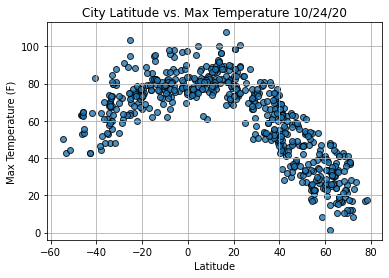

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

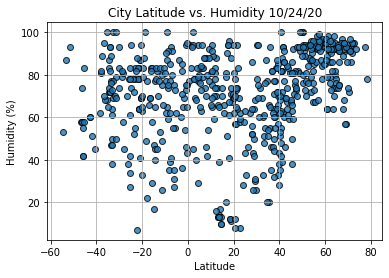

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

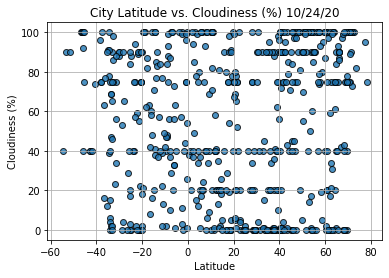

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

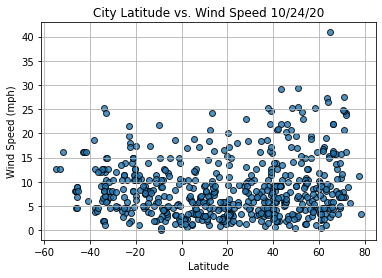

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [32]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
# Create a Northern Hemisphere df
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2020-10-24 16:46:58
Lat                        -33.65
Lng                        115.33
Max Temp                    60.01
Humidity                       47
Cloudiness                     69
Wind Speed                  12.12
Name: 13, dtype: object

In [50]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2020-10-24 16:46:57,69.45,-133.04,10.40,92,40,4.70
1,Nuuk,GL,2020-10-24 16:46:57,64.18,-51.72,30.20,80,20,4.70
2,The Pas,CA,2020-10-24 16:43:06,53.83,-101.25,23.00,79,90,14.99
3,Letnyaya Stavka,RU,2020-10-24 16:46:57,45.43,43.45,58.06,63,45,1.90
4,Hilo,US,2020-10-24 16:46:57,19.73,-155.09,73.40,69,75,5.82
5,Bredasdorp,ZA,2020-10-24 16:46:57,-34.53,20.04,68.00,72,39,12.75
6,Severo-Kurilsk,RU,2020-10-24 16:46:57,50.68,156.12,46.78,91,100,29.33
7,Mount Gambier,AU,2020-10-24 16:46:58,-37.83,140.77,44.60,81,75,12.75
8,Barreirinha,BR,2020-10-24 16:46:58,-2.79,-57.07,97.07,36,100,3.15
9,Kampot,KH,2020-10-24 16:46:58,10.62,104.18,80.60,94,20,2.93


In [33]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [51]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2020-10-24 16:46:57,69.45,-133.04,10.40,92,40,4.70
1,Nuuk,GL,2020-10-24 16:46:57,64.18,-51.72,30.20,80,20,4.70
2,The Pas,CA,2020-10-24 16:43:06,53.83,-101.25,23.00,79,90,14.99
3,Letnyaya Stavka,RU,2020-10-24 16:46:57,45.43,43.45,58.06,63,45,1.90
4,Hilo,US,2020-10-24 16:46:57,19.73,-155.09,73.40,69,75,5.82


In [52]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
5,Bredasdorp,ZA,2020-10-24 16:46:57,-34.53,20.04,68.00,72,39,12.75
7,Mount Gambier,AU,2020-10-24 16:46:58,-37.83,140.77,44.60,81,75,12.75
8,Barreirinha,BR,2020-10-24 16:46:58,-2.79,-57.07,97.07,36,100,3.15
11,Kaitangata,NZ,2020-10-24 16:46:58,-46.28,169.85,52.99,74,100,4.70
13,Busselton,AU,2020-10-24 16:46:58,-33.65,115.33,60.01,47,69,12.12


In [69]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title('Linear Regression on the Northern Hemisphere for Maximum Temperature')
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp (F)')
    plt.show()

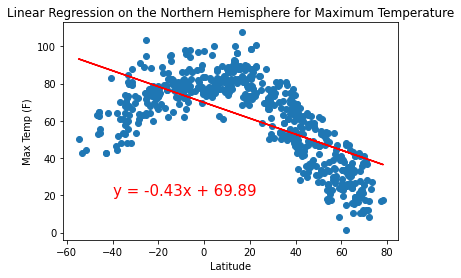

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(lats, max_temps,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(-40,20))


In [71]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"p-value: {p_value:.3f}")
print(f"r-value: {r_value:.2f}")
print(f"standard deviation: {std_err:.3f}")

y = -1.01x + 95.27
p-value: 0.000
r-value: -0.89
standard deviation: 0.027


In [38]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title('Linear Regression on the Southern Hemisphere for Maximum Temperature')
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp (F)')
    plt.show()

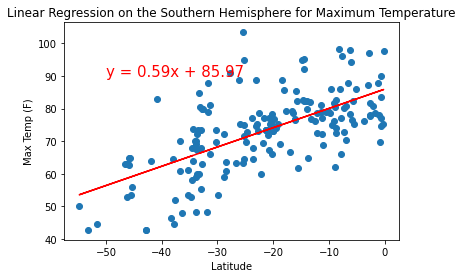

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

In [75]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title('Linear Regression on the Northern Hemisphere for Humidity %')
    plt.xlabel('Latitude')
    plt.ylabel('Humidity %')
    plt.show()

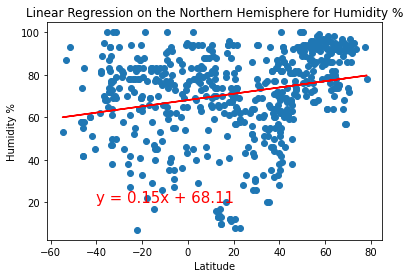

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(lats, humidity,
                       'Linear Regression on the Northern Hemisphere for Humidity', 'Humidity %',(-40,20))

In [77]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"p-value: {p_value:.3f}")
print(f"r-value: {r_value:.2f}")
print(f"standard deviation: {std_err:.3f}")

y = 0.4x + 56.96
p-value: 0.000
r-value: 0.39
standard deviation: 0.049


In [72]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title('Linear Regression on the Southern Hemisphere for Humidity')
    plt.xlabel('Latitude')
    plt.ylabel('Humidity %')
    plt.show()

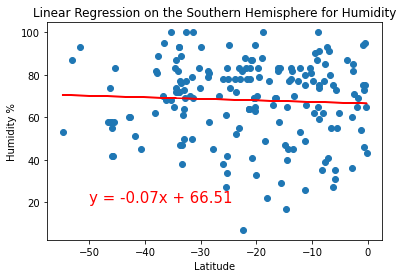

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Humidity', 'Humidity %',(-50,20))

In [74]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"p-value: {p_value:.3f}")
print(f"r-value: {r_value:.2f}")
print(f"standard deviation: {std_err:.3f}")

y = -0.07x + 66.51
p-value: 0.500
r-value: -0.05
standard deviation: 0.107


In [80]:
# 6.4.4 Skill Drill fpr Northern Hemisphere
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title('Linear Regression on the Northern Hemisphere for % Cloudiness')
    plt.xlabel('Latitude')
    plt.ylabel('Cloudiness')
    plt.show()

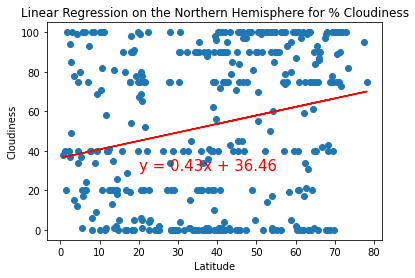

In [82]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(20,30))

In [83]:
# 6.4.4 Skill Drill for Southern Hemisphere
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title('Linear Regression on the Southern Hemisphere for % Cloudiness')
    plt.xlabel('Latitude')
    plt.ylabel('Cloudiness')
    plt.show()

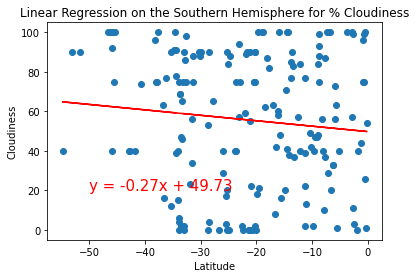

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,20))

In [96]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title('Linear Regression on the Northern Hemisphere for Wind Speed')
    plt.xlabel('Latitude')
    plt.ylabel('Wind Speed')
    plt.show()

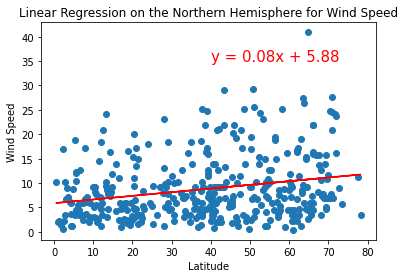

p-value: 0.000
r-value: 0.39
standard deviation: 0.049


In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))
print(f"p-value: {p_value:.3f}")
print(f"r-value: {r_value:.2f}")
print(f"standard deviation: {std_err:.3f}")

In [98]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title('Linear Regression on the Southern Hemisphere for Wind Speed')
    plt.xlabel('Latitude')
    plt.ylabel('Wind Speed')
    plt.show()

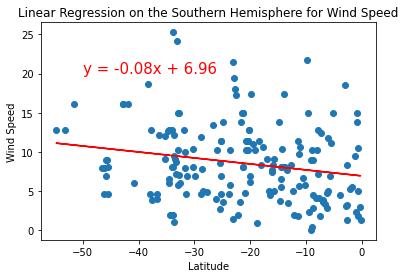

p-value: 0.000
r-value: 0.39
standard deviation: 0.049


In [100]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,20))

print(f"p-value: {p_value:.3f}")
print(f"r-value: {r_value:.2f}")
print(f"standard deviation: {std_err:.3f}")